# import 

In [1]:
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt
import networkx as nx 
import community.community_louvain
import community as community_louvain
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import scipy.stats as stats
import pandas as pd 

# Auxillary Functions 

## Part A

In [2]:
def part1(partition):
    partition_value=list(partition.values())
    partition_key=list(partition.keys())
    number_of_comm=max(partition_value)+1
    print('number of communities: ', number_of_comm)
    return partition_value, partition_key, number_of_comm

def GraphRelabeling(old_graph, node_labels):
    graph_mat = nx.adjacency_matrix(old_graph, nodelist = node_labels)
    sparse_adj = np.array(graph_mat.todense())
    relabeled_graph = nx.from_numpy_matrix(sparse_adj)
    return sparse_adj, relabeled_graph

def InitialSortingCommunities(partition_value, partition_key, number_of_comm):
    index_comm=[]
    for i in range(0,number_of_comm):
        x=[np.where(np.array(partition_value)==i)[0]]
        index_comm.extend(x) 
    node_list_temp=[]
    size=[]
    for i in range(0,number_of_comm):
        c=np.where(np.array(partition_value)==i)[0]
        size.append(c.size)
        node_list_temp.extend([np.array(partition_key)[c]])
    print("size: ", size)
    print("number of communitis: ", len(size))
    #node_list_old=sorted(node_list_temp,key=len)
    node_list=[]
    for i in range(0, number_of_comm):
        node_list.extend(list(node_list_temp[i]))
    return size, node_list, node_list_temp

def SumOfRCofCommunities(comm_size, B):
    ind_list = [sum(comm_size[:i]) for i in range(0, len(comm_size) + 1)]
    Emp = np.zeros([len(comm_size), len(comm_size)])
    for j in range(0, len(comm_size)): 
        emp = []
        sub_mat = B[ind_list[j]:ind_list[j + 1], :]
        for i in range(0, len(comm_size)):
            emp.append(np.sum(sub_mat[:, ind_list[i]:ind_list[i+1]]))
            #print(emp)
        Emp[j, :] = np.array(emp)
    df = pd.DataFrame(Emp)
    return Emp, df

def BetterPartition(Emp, comm_size): 
    first_row_sum = Emp[0,:]
    n = [i for i in range(0, len(comm_size))]
    myzip =  zip(n[1:], first_row_sum[1:])
    mydictionary = dict(myzip)
    sorted_dict = dict(sorted(mydictionary.items(), key = lambda x: x[1], reverse = True))
    lsorted_dict = list(sorted_dict.keys())
    partition_list = [0] + lsorted_dict
    return partition_list

def RelabelBetterPartion(partition_list, node_list_temp):
    comm_list_new = []
    comm_size_new = []
    for i in partition_list: 
        comm_size_new.append(len(node_list_temp[i]))
        comm_list_new.extend(node_list_temp[i]) 
    return comm_size_new, comm_list_new

## Part B.1

In [4]:
def UpdateRule1(A,X):
    B=A*np.transpose(np.abs(X))
    P=np.transpose(np.sign(X))-X
    out=np.sum(B*P,axis=1,keepdims = True)+X
    return out 

def Weight(a1,b1):
    W=(a1)+(b1-a1)*np.random.rand(NodesNum,NodesNum) #weight matrix
    return W

def Adjacency(G):
    B = nx.adjacency_matrix(G)
    AG=np.array(B.todense())
    return AG

def Initial(a2,b2,NodesNum):
    X0=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state 
    return X0

def InitiaExclusive(a11, a12, a21, a22, b11, b12, b21, b22, NodesNum11, NodesNum12, NodesNum21, NodesNum22):
    X011=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state group 11 
    X012=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state group 12 
    X021=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state group 21 
    X022=(a2)+(b2-a2)*np.random.rand(NodesNum,1) #initial state group 22
    X0=np.concat((X011,X012,X021,X022),axis=1)
    return X0

def PossibleInteGraph(NodesNum,pL,AG):
    RandInt=np.random.rand(NodesNum,NodesNum)
    Smaller=(RandInt<=pL)*1
    Bigger=(RandInt>=pL)*1
    InteGraph=(Smaller*(1)+Bigger*(0))*AG
    return InteGraph

def checkWeight(arr,value):
    if np.prod(arr>=value):
        ok=1
        ind=[]
    else:
        ok=0
        ind=np.where(arr<value)
    return ok,ind

def checkSum(arr,value):
    if np.prod(arr<=value):
        ok=1
        ind=[]
    else:
        ok=0
        ind=np.where(arr>value)
    return ok,ind

def ShowAlpha(GammaB,i):
    PolyB=[GammaB, (1-GammaB), 1]
    RootB=np.roots(PolyB)
    digit=3 #for rounding
    print("GammaB{}={}, Alpha1= {}, Alpha2= {}".format(i,GammaB,round(np.min(RootB),digit),round(np.max(RootB),digit)))
    return round(np.min(RootB),digit), round(np.max(RootB),digit)

def linesB(t0B,AlphaB,i):
  signB=np.sign(AlphaB)
  xLine1=t0B*np.ones([10])
  yLine1=np.linspace(AlphaB,-1,10)
  plt.plot(xLine1,yLine1,color='k',linewidth=2)

  xLine2=np.linspace(0,t0B,10)
  yLine2=AlphaB*np.ones([10])
  plt.plot(xLine2,yLine2,color='k',linewidth=2)


  
def xAxisText(tStop,t0Bj):
  xrange=[i*100 for i in range(0,int(tStop/100+1))]
  xrange.append(t0Bj)
  xrange=sorted(xrange)
  xrangeStr=[str(i) for i in xrange]
  return xrange, xrangeStr

def yAxisText(alphaB):
  yrange=list(np.linspace(-1,1,9))
  yrange.append(alphaB)
  yrange=sorted(yrange)
  yrangeStr=[str(i) for i in xrange]
  return yrange, yrangeStr

## Part B.2
## Ratio Check

###  Notes 

#### Our theorem: $\forall i \in B~~ \sum_{j\in B} w_{ij}(t)\geq \gamma_B \sum_{j \notin B} w_{ij}(t)$

#### First for ease of writting suppose that: 
#### $\sum_{j\in B} w_{ij}(t)=a$.
#### $\sum_{j\in B} w_{ij}(t)=b$.
---
#### If some $t\geq 0$ exits, there are four possible situations:
1.   $\frac{a}{b}\geq \gamma_B$ which is **great**.

2.   $a\neq 0, b=0$ there is **no** problem, because $a\geq \gamma_B\times0=0$

3.   $a,b=0$, there is also **no** prolem, because $a=0 \geq b=0$.

   *It only needs to be taken care in code*.

4.   $a=0, b\neq 0$, there is a **big** problem, cause the theorem is no longer satisfied, we can solve this by forcing the interactions out of $B$ to be freezed, or more persicely forcing $\sum_{j \notin B} w_{ij}(t)=0 \rightarrow \forall i \in B, \forall j \notin B ~~ w_{ij}(t)=0$.


In [5]:
def RatioCorrectionPC_Opt(h,sumh1,sumh1Out,s1,s2,CoeffBd,i):
    ratio_h1=np.ones(np.shape(sumh1))

    arr1 = (sumh1==0)
    arr2= (sumh1Out==0)

    arr1n= np.invert(arr1)
    arr2n= np.invert(arr2)

    zh1=np.where( arr1 & arr2n )[0] #a=0, b!=0

    zh1Out=np.where( arr1n & arr2)[0] #a=0, b!=0  

    zh1Both=np.where( arr1 & arr2 )[0] #a=0, b=0

    zh1NotBoth=np.where(arr1n & arr2n)[0]  #a!=0, b!=0

    if np.size(zh1)!=0: #a=0, b~=0
      #the first worst case: a=0, b~=0--> we have to force b to be zero, to maintain bubble property 
      h=BubbleForcingCase2(h,zh1,sumh1,s1,s2,i)#forcing those who are out of bubbles (b) to be zero.
      #ratio correction
      ratio_h1[zh1]=np.zeros((len(zh1),1)) #make sure the ratio is zero
      #print('ratio_h1[zh1]',ratio_h1[zh1])

    if np.size(zh1Both)!=0: #a=0, b=0
      #the second (worst) case: a=b=0-> we only have to modify the ratio, 
      #so that no errors such "zero division" arise.

      #ratio correction
      ratio_h1[zh1Both]=np.zeros((len(zh1Both),1))
      #print('ratio_h1[zh1Both]',ratio_h1[zh1Both])
    
    if np.size(zh1Out)!=0: #a!=0, b=0
      #the third case: where a!=0, b=0
      ratio_h1[zh1Out]=np.ones((len(zh1Out),1))

    if np.size(zh1NotBoth)!=0: #a!=0, b!=0
      #the first case:  a!=0,b!=0 
      ratio_h1[zh1NotBoth]=(CoeffBd+0.002)*(sumh1Out[zh1NotBoth]/sumh1[zh1NotBoth])
      #print('ratio_h1[h1NotBothOnly]', ratio_h1[h1NotBothOnly])
    #print('*****************************')
    #print(ratio_h1)
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return h, ratio_h1

In [6]:
def RatioCorrection(h,sumh1,sumh1Out,s1,s2,GammaB,i):
    ratio_h1=np.ones(np.shape(sumh1))

    zh1=np.where((sumh1==0))[0] #a=0
    zh1Out=np.where((sumh1Out==0))[0] #b=0
    
    #array to set transform
    zh1Set=set(zh1)
    zh1OutSet=set(zh1Out)
    zh1UnionSet=zh1Set | zh1OutSet
    zh1IntersecSect=zh1Set & zh1OutSet
    rangeSet=set(range(0,len(sumh1)))
    #print('i',i)
    #print('zh1Set',zh1Set)
    #print('zh1OutSet',zh1OutSet)
    #print('zh1UnionSet',zh1UnionSet)
    #print('zh1IntersecSect',zh1IntersecSect)
    
    # finding unique address
    h1Only=np.array(list(zh1Set - zh1OutSet)) #a=0, b~=0
    h1OutOnly=np.array(list(zh1OutSet - zh1Set)) #a~=0, b~=0
    h1BothOnly=np.array(list(zh1IntersecSect)) #a=b=0
    h1NotBothOnly= np.array(list(rangeSet - zh1UnionSet)) #a=b~=0
    #print('h1Only',h1Only)
    #print('h1OutOnly',h1OutOnly)
    #print('h1BothOnly',h1BothOnly)
    #print('h1NotBothOnly',h1NotBothOnly)
    #Cases 
    if np.size(h1Only)!=0: #a=0, b~=0
      #the first worst case: a=0, b~=0--> we have to force b to be zero, to maintain bubble property 
      h=BubbleForcingCase2(h,h1Only,sumh1,s1,s2,i) #forcing those who are out of bubbles (b) to be zero.
      #ratio correction
      ratio_h1[h1Only]=np.zeros((len(h1Only),1)) #make sure the ratio is zero
      #print('ratio_h1[h1Only]',ratio_h1[h1Only])

    if np.size(h1BothOnly)!=0: #a=0, b=0
      #the second (worst) case: a=b=0-> we only have to modify the ratio, 
      #so that no errors such "zero division" arise.

      #ratio correction
      ratio_h1[h1BothOnly]=np.zeros((len(h1BothOnly),1))
      #print('ratio_h1[h1BothOnly]',ratio_h1[h1BothOnly])
    
    if np.size(h1OutOnly)!=0: #a!=0, b=0
      #the third case: where a!=0, b=0
      ratio_h1[h1OutOnly]=np.ones((len(h1OutOnly),1))

    if np.size(h1NotBothOnly)!=0: #a!=0, b!=0
      #the first case:  a!=0,b!=0 
      ratio_h1[h1NotBothOnly]=(GammaB+0.001)*(sumh1Out[h1NotBothOnly]/sumh1[h1NotBothOnly])
      #print('ratio_h1[h1NotBothOnly]', ratio_h1[h1NotBothOnly])
    #print('*****************************')
    #print(ratio_h1)
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return h, ratio_h1

## Bubble Forcing 

In [6]:
def BubbleForcingCase1(h,h1Only,sumh1,s1,s2,s3,i):
  ONEz=np.ones(len(sumh1),)
  ONEz[h1Only]=np.zeros(len(h1Only),)
  if i==1:
    h[0:s1,:]=np.copy(np.dot(np.diag(ONEz),h[0:s1,:]))
  if i==2:
    h[s1:s2,:]=np.copy(np.dot(np.diag(ONEz),h[s1:s2,:]))
  if i==3:
    h[s2:s3,:]=np.copy(np.dot(np.diag(ONEz),h[s2:s3,:]))
  return h 

In [7]:
def BubbleForcingCase2(h,h1Only,sumh1,s1,s2,i):
  ONEz=np.ones(len(sumh1),)
  ONEz[h1Only]=np.zeros(len(h1Only),)
  if i==1:
    h[0:s1,:]=np.copy(np.dot(np.diag(ONEz),h[0:s1,:]))
  if i==2:
    h[s1:,:]=np.copy(np.dot(np.diag(ONEz),h[s1:,:]))
  return h

## Check Ratio 

In [8]:
def CheckRatio(sum1,sum2,GammaB):
  check=(sum1>=(GammaB*sum2))
  if np.all(check): 
    notif=1
  elif not np.all(check):
    notif=0
    arr=np.where((check*1)==0)[0]
  return notif, arr

In [9]:
def CheckRatioNew(sum1,sum2,GammaB):
    z=np.where((sum1==0))[0] #a=0
    zOut=np.where((sum2==0))[0] #b=0
    notif=np.ones(len(sum1),)

    #array to set transform
    zSet=set(z)
    zOutSet=set(zOut)
    zUnionSet=zSet | zOutSet
    zIntersecSect=zSet & zOutSet
    rangeSet=set(range(0,len(sum1)))

    # finding unique address
    Only=np.array(list(zSet - zOutSet)) #a=0, b~=0
    OutOnly=np.array(list(zOutSet - zSet)) #a~=0, b=0
    BothOnly=np.array(list(zIntersecSect)) #a=b=0
    NotBothOnly= np.array(list(rangeSet - zUnionSet)) #a=b~=0

    if np.size(Only)!=0:
      notif[Only]=np.zeros(len(Only),)

    if np.size(OutOnly)!=0:
      notif[OutOnly]=np.ones(len(OutOnly),)

    if np.size(BothOnly)!=0:
      notif[BothOnly]=np.ones(len(BothOnly),)

    if np.size(NotBothOnly)!=0:
      RATIO=sum1[NotBothOnly]/sum2[NotBothOnly]
      RATIO_Check=(RATIO>=GammaB)
      if False in RATIO_Check:
        whereZ=np.where(RATIO_Check==0)[0]
        notif[whereZ]=np.zeros(len(whereZ),)
    #print(notif)
    arr=np.array([])
    if False in notif:
      notification = 0
      arr=np.where(notif==0)[0]
    else: 
      notification = 1
    return notification, arr

## Generate A with Bubble Property

In [10]:
def GenerateAwithBubPropCase2(NodesNum,comm_size,GammaB,h,ti):

    # GammaB
    GammaB1=GammaB[0]
    GammaB2=GammaB[1]
    epsilon=0.001

    # index for bubbles and outside the bubbles 

    Range=set(range(0,NodesNum))

    s1,s2=S1S2(comm_size)
    # 0:s1 bubble 1 
    # s2:s3 bubble 2 
    # s2:s3 bubble 3 
    # s3: out 
    
    h1=h[0:s1,0:s1]
    h1Out=h[0:s1,s1:]

    h2=h[s1:,s1:]
    h2Out=h[s1:,0:s1]
  
    # sum for bubble 1 and outside bubble 1
    sumh1=np.sum(h1,axis=1,keepdims = True)
    sumh1Out=np.sum(h1Out,axis=1,keepdims = True)

    # sum for bubble 2 and outside bubble 2
    sumh2=np.sum(h2,axis=1,keepdims = True)
    sumh2Out=np.sum(h2Out,axis=1,keepdims = True)


    h,ratio_h1=RatioCorrectionPC_Opt(h,sumh1,sumh1Out,s1,s2,GammaB1,1)
    h,ratio_h2=RatioCorrectionPC_Opt(h,sumh2,sumh2Out,s1,s2,GammaB2,2)
  

    #print(np.shape(ratio_h1))
    #print(np.shape(h1))


    h[0:s1,0:s1]=np.copy((ratio_h1*h[0:s1,0:s1]))
    h[s1:,s1:]=np.copy((ratio_h2*h[s1:,s1:]))
 

    norm=np.sum(h,axis=1,keepdims = True)
    Hn=(1/(norm+0.1))*h

    sumHn=np.sum(Hn,axis=1,keepdims = True)
    notifHn,arrHn=checkSum(sumHn,1)

    sumHn1=np.sum(Hn[0:s1,0:s1],axis=1,keepdims = True) #bubble 1
    sumHn1Out=np.sum(Hn[0:s1,s1:],axis=1,keepdims = True) #outside bubble 1
    #print('B1: ')
    #print(sumHn1/sumHn1Out)
    #print('sumHn1')
    #print(sumHn1)
    #print('sumHn1Out')
    #print(sumHn1Out)



    sumHn2=np.sum(Hn[s1:,s1:],axis=1,keepdims = True) #bubble 2
    u2=Hn[s1:,0:s1]
    sumHn2Out=np.sum(u2,axis=1,keepdims = True) #outside bubble 2
    #print('B2: ')
    #print(sumHn2/sumHn2Out)
    #print('sumHn2')
    #print(sumHn2)
    #print('sumHn2Out')
    #print(sumHn2Out)


    notif1,arr1=CheckRatioNew(sumHn1,sumHn1Out,GammaB1)
    notif2,arr2=CheckRatioNew(sumHn2,sumHn2Out,GammaB2)

    notif=[notif1,notif2]
    arr=[arr1,arr2]

    if notif==[0,0]:
       print('due to B={}, B={} for t={}'.format(1,2,ti))
       print('for B={} in row:'.format(1))
       print(arr1)
       print('for B={} in row:'.format(2))
       print(arr2)

    elif not notif==[0,0] and not notif==[1,1]:
      print('Bubble Property did not satisfied for t={}'.format(ti))
      if notif==[0,1]:
        print('due to B={} for t={}'.format(1,ti))
        print('in row:')
        print(arr1)
      elif notif==[1,0]:
        print('due to B={} for t={}'.format(2,ti))
        print('in row:')
        print(arr2)
    #print('--------------------------------------')
    #print(' ')
    return Hn,notifHn,arrHn, notif, arr

## Initial Condition

In [11]:
def X0NormalDistributionCase2(NodesNum, comm_size, GammaB, mu, sigma):
  s1,s2=S1S2(comm_size)

  range_1=range(0,s1)
  range_2=range(s1,NodesNum)
  
  NB1=s1
  NB2=NodesNum-s1
  #print('NB1={}, NB2={}, NB3={}, NOut={}'.format(NB1,NB2,NB3,NOut))
  muB1=mu[0]
  muB2=mu[1]
    
  sigmaB1=sigma[0]
  sigmaB2=sigma[1]

  X0=np.zeros((NodesNum))
  lower, upper = -1, 1
  # exteract N samples from a normal distribution 
  X0[range_1]=stats.truncnorm((lower - muB1)/sigmaB1, (upper - muB1)/sigmaB1, loc=muB1, scale=sigmaB1).rvs(NB1)
  X0[range_2]=stats.truncnorm((lower - muB2)/sigmaB2, (upper - muB2)/sigmaB2, loc=muB2, scale=sigmaB2).rvs(NB2)
  return X0

## Main

In [12]:
def ModelOneCase2(GammaB, WeightCoeff, NodesNum, Gnew, pL, comm_size, mu1, mu2, sigma1, sigma2):
    AG=Adjacency(Gnew)
    Abig=np.zeros((NodesNum,NodesNum*(t+1)))
    X1=np.zeros((NodesNum,t+1))
    X2=X=np.zeros((NodesNum,t+1))
    X10=X0NormalDistributionCase2(NodesNum,comm_size, GammaB, mu1, sigma1)
    X20=X0NormalDistributionCase2(NodesNum,comm_size, GammaB, mu2, sigma2)   
    for i in range(1,t+1):
        if i==1:
            X1[:,i-1]=X10
            X2[:,i-1]=X20
            #print(X[:,i-1])
            #print(X0.shape)
        InteGraph=PossibleInteGraph(NodesNum,pL,AG)
        h=np.random.rand(NodesNum,NodesNum)*InteGraph
        ti=i
        Hn,ok1,ind1,ok2,ind2=GenerateAwithBubPropCase2(NodesNum,comm_size ,GammaB,h,ti)
        Hnw=(WeightCoeff)*Hn
        y1=UpdateRule1(Hnw,X1[:,i-1].reshape((NodesNum,1)))
        y2=UpdateRule1(Hnw,X2[:,i-1].reshape((NodesNum,1)))
        X1[:,i]=y1.reshape((NodesNum))
        X2[:,i]=y2.reshape((NodesNum))
        #print(y.shape)
        #print(X[:,i].shape)


    #print('ok1={}, ind1={}, ok2={}, ind2={}'.format(ok1, ind1, ok2, ind2))
    
    return X1,X2

In [13]:
def TimeBubble(bubble, alpha1, alpha2, size, whichB):
    if all(bubble[-1]>=0):  
        ## (t0)
        index0TFB=(bubble>=1*alpha1)*1
        MatBIndex0=np.dot(index0TFB,np.ones([size,1]))
        t0B=np.min(np.where(MatBIndex0==size)[0])

        ## (tf)
        indexfTFB=(bubble>=1*alpha2)*1
        MatBIndexf=np.dot(indexfTFB,np.ones([size,1]))
        tfB=np.min(np.where(MatBIndexf==size)[0])
        index=1

        #print
        print('+Up+')
        print(f'index{index}=', index)
        print(f't0B{whichB}=',t0B, f', tfB{whichB}=', tfB)
    

    ## bubble (-)
    elif all(bubble[-1]<=0):
        ## (t0)
        index0TFB=(bubble<=-1*alpha1)*1
        MatBIndex0=np.dot(index0TFB,np.ones([size,1]))
        t0B=np.min(np.where(MatBIndex0==size)[0])

        ## (tf)
        indexfTFB=(bubble<=-1*alpha2)*1
        MatBIndexf=np.dot(indexfTFB,np.ones([size,1]))
        tfB=np.min(np.where(MatBIndexf==size)[0])
        index = -1

        # print
        print('-Down-')
        print(f'index{index}=', index)
        print(f't0B{whichB}=',t0B, f', tfB{whichB}=', tfB)

    # result
    return t0B, tfB, index

In [43]:
# adjust matplotlib parameters
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif']= "Computer Modern"

def PLot(bubbe1, bubble2, tfB1, t0B1, t0B2, tfB2, index_B1, index_B2, name):
  color1='#7c2a20'
  color2='#34475b'
  color3='#cd8f87'
  color4='#8799aa'
  mylinestyleB='-'
  mylinestyleM='-'
  FONT=15
  linewidthM=2.5
  linewidthB=1


  plt.figure(figsize=[8,6])
  plt.plot(bubble1[0:(tStop+1)][:] ,color=color1, linestyle = mylinestyleB, linewidth=linewidthB)
  plt.plot(bubble2[0:(tStop+1)][:], color=color2, linestyle = mylinestyleB, linewidth=linewidthB)

  MedianB1=np.median(bubble1[0:(tStop+1)][:],axis=1)
  MedianB2=np.median(bubble2[0:(tStop+1)][:],axis=1)

  plt.plot(MedianB1, color=color3, linestyle = mylinestyleM, linewidth=linewidthM)
  plt.plot(MedianB2, color=color4, linestyle = mylinestyleM, linewidth=linewidthM)

  plt.xlabel(r"$t$", fontsize=FONT)
  plt.ylabel(r"$X(t)$", fontsize=FONT)

  
  Parts=100

  x1LineB1=np.linspace(t0B1,Parts+t0B1-1,Parts)
  x2LineB1=np.linspace(tfB1,Parts+tfB1-1,Parts)

  x1LineB2=np.linspace(t0B2,Parts+t0B2-1,Parts)
  x2LineB2=np.linspace(tfB2,Parts+tfB2-1,Parts)

  yline=np.ones(Parts)

  plt.plot(x1LineB1, index_B1*alpha1_B1*yline, color='black', linestyle='-', linewidth=2)
  plt.plot(x2LineB1, index_B1*alpha2_B1*yline, color='black', linestyle='-', linewidth=2)

  plt.plot(x1LineB2, index_B2*alpha1_B2*yline, color='black', linestyle='-', linewidth=2)
  plt.plot(x2LineB2, index_B2*alpha2_B2*yline, color='black', linestyle='-', linewidth=2)


  patch1 = mpatches.Patch(color=color1, linestyle = mylinestyleB, label=r'$\mathcal{B}_1$')
  patch2 = mpatches.Patch(color=color2, linestyle = mylinestyleB, label=r'$\mathcal{B}_2$')
  patch3 = mpatches.Patch(color=color3, linestyle = mylinestyleM, label=r'$Med(\mathcal{B}_1)$')
  patch4 = mpatches.Patch(color=color4, linestyle = mylinestyleM, label=r'$Med(\mathcal{B}_2)$')

  plt.legend(handles=[patch1, patch2, patch3, patch4], prop={'size': FONT}, loc='upper center',\
             bbox_to_anchor=(0.5, 1.10), frameon=1, ncol=4) 


  espU=0.05
  espD=-0.08
  move=-15
  props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    
  plt.text(t0B1, index_B1*alpha1_B1+espU, r'$\alpha_1$ for $\mathcal{B}_1$', fontsize=FONT,
           color=color1, bbox=props)
  plt.text(tfB1, index_B1*alpha2_B1+espU, r'$\alpha_2$ for $\mathcal{B}_1$', fontsize=FONT,
           color=color1, bbox=props)

  plt.text(t0B2, index_B2*alpha1_B2+espU, r'$-\alpha_1$ for $\mathcal{B}_2$', fontsize=FONT,
           color=color2, bbox=props)
  plt.text(tfB2, index_B2*alpha2_B2+espU, r'$-\alpha_2$ for $\mathcal{B}_2$', fontsize=FONT, 
           color=color2, bbox=props)
    

  plt.rcParams.update({'font.size':FONT})
  plt.ylim(-1,1)
  plt.xlim(0,tStop)
  plt.grid(color='#e1e0e1', linestyle='-', linewidth=2)
  plt.savefig(name, format='png', dpi = 700)
  plt.show()

# Test

In [17]:
NodesNum=500
pGt=np.log(NodesNum)/NodesNum
ep=0.05
pG=pGt+ep
print('pGt:', pGt, ", pG:", pG)

G=nx.erdos_renyi_graph(NodesNum, pG, seed=None, directed=False)
partition = community.community_louvain.best_partition(G)
partition_value, partition_key, number_of_comm=part1(partition)

size, node_list, node_list_temp = InitialSortingCommunities(partition_value, partition_key, number_of_comm)
B, G1 = GraphRelabeling(G, node_list)
Emp, df = SumOfRCofCommunities(size, B)

better_partition = BetterPartition(Emp, size)
comm_size_new, comm_list_new = RelabelBetterPartion(better_partition, node_list_temp)
B2, G2 = GraphRelabeling(G1, comm_list_new)

pGt: 0.012429216196844383 , pG: 0.062429216196844384
number of communities:  10
size:  [54, 34, 73, 22, 28, 42, 63, 62, 70, 52]
number of communitis:  10


In [19]:
def S1S2(comm_size):
  st1 = 4
  s1 = np.sum(comm_size[0:st1])
  s2 = s1 + np.sum(comm_size[st1:])
  return s1,s2
s1, s2 = S1S2(comm_size_new)
print('B1:{}, B2:{}'.format((s1),(NodesNum - (s1))))

B1:260, B2:240


### Variables

In [29]:
pL=0.8
t = 1000

#bubble number for bubble 1
GammaB1 = 6
#bubble number for bubble 2
GammaB2 = 9

#GammaB vector
GammaB=[GammaB1,GammaB2]; i=[1,2]

WeightCoeff = 0.015
Epsilon = 0.1

# mu1 - mean for dimension 1 for B1 and B2 respectively 
mu1=[0.09, -0.07]
# mu2 - mean for dimension 2 for B1 and B2 respectively 
mu2=[-0.08, 0.06]

SigmaSquared1=[0.15, 0.12]
sigma1=np.sqrt(SigmaSquared1)

SigmaSquared2=[0.13, 0.14]
sigma2=np.sqrt(SigmaSquared2)

print('NumNodes',NodesNum)
print('pG',pG)
print('pL',pL)
print('B1:{}, B2:{}'.format((s1),(NodesNum-(s1))))

# alpha 1 and alpha 2 for GammaB
alpha1_B1, alpha2_B1= ShowAlpha(GammaB[0],i[0])
alpha1_B2, alpha2_B2= ShowAlpha(GammaB[1],i[1])

print('mu1: ',mu1)
print('mu2: ',mu2)
print('Sigma1: ', SigmaSquared1)
print('Sigma2: ', SigmaSquared2)

NumNodes 500
pG 0.062429216196844384
pL 0.8
B1:260, B2:240
GammaB1=6, Alpha1= 0.333, Alpha2= 0.5
GammaB2=9, Alpha1= 0.15, Alpha2= 0.738
mu1:  [0.09, -0.07]
mu2:  [-0.08, 0.06]
Sigma1:  [0.15, 0.12]
Sigma2:  [0.13, 0.14]


# Test Function 

In [46]:
X1,X2=ModelOneCase2(GammaB, WeightCoeff, NodesNum, G2, pL, comm_size_new, mu1, mu2, sigma1, sigma2)

bubble1_t1=np.transpose(X1)[:,0:s1]
bubble1_t2=np.transpose(X2)[:,0:s1]

bubble2_t1=np.transpose(X1)[:,s1:]
bubble2_t2=np.transpose(X2)[:,s1:]

In [31]:
# rows: time 
# columns: each member of the bubble 
# print(np.mean(bubble1_t1[0, :])) 
# print(np.mean(bubble2_t1[0, :]))

# print(np.mean(bubble1_t2[0, :])) 
# print(np.mean(bubble2_t2[0, :]))

## Time 

In [47]:
tStop = t
t0B1_t1, tfB1_t1, index_B1_t1= TimeBubble(bubble1_t1, alpha1_B1, alpha2_B1, s1, 1)
print('-----------------')
t0B2_t1, tfB2_t1, index_B2_t1= TimeBubble(bubble2_t1, alpha1_B2, alpha2_B2, s2-s1, 2)
print('-----------------')

-Down-
index-1= -1
t0B1= 752 , tfB1= 783
-----------------
-Down-
index-1= -1
t0B2= 257 , tfB2= 396
-----------------


In [48]:
t0B1_t2, tfB1_t2, index_B1_t2= TimeBubble(bubble1_t2, alpha1_B1, alpha2_B1, s1, 1)
print('-----------------')
t0B2_t2, tfB2_t2, index_B2_t2= TimeBubble(bubble2_t2, alpha1_B2, alpha2_B2, s2-s1, 2)
print('-----------------')

-Down-
index-1= -1
t0B1= 430 , tfB1= 533
-----------------
+Up+
index1= 1
t0B2= 380 , tfB2= 575
-----------------


# save

```
df1_t1 = pd.DataFrame(bubble1_t1)
df1_t1.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B1_topic_1.csv')

df2_t1 = pd.DataFrame(bubble2_t1)
df2_t1.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B2_topic_1.csv')

df1_t2 = pd.DataFrame(bubble1_t2)
df1_t2.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B1_topic_2.csv')

df2_t2 = pd.DataFrame(bubble2_t2)
df2_t2.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B2_topic_2.csv')
```

```
df1_t1 = pd.DataFrame(bubble1_t1)
df1_t1.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B1_topic_1.csv')

df2_t1 = pd.DataFrame(bubble2_t1)
df2_t1.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B2_topic_1.csv')

df1_t2 = pd.DataFrame(bubble1_t2)
df1_t2.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B1_topic_2.csv')

df2_t2 = pd.DataFrame(bubble2_t2)
df2_t2.to_csv(r'C:\Users\R\Desktop\Data\2d_model1.B2_topic_2.csv')
```

## Plot time Series 

In [41]:
tStop=1000

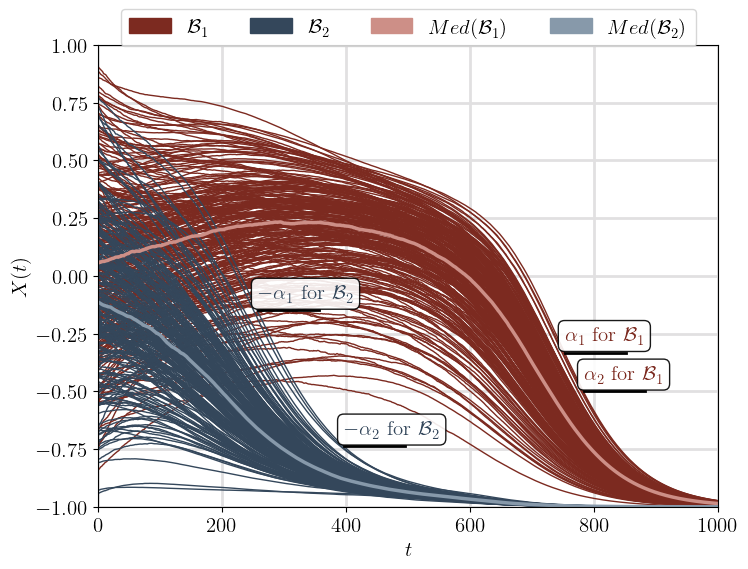

In [49]:
bubble1, bubble2, tfB1, t0B1, t0B2, tfB2 = bubble1_t1, bubble2_t1, tfB1_t1, t0B1_t1, t0B2_t1, tfB2_t1
index_B1, index_B2 = index_B1_t1, index_B2_t1
name = 'topic 1.png'
PLot(bubble1, bubble2, tfB1, t0B1, t0B2, tfB2, index_B1, index_B2,name)

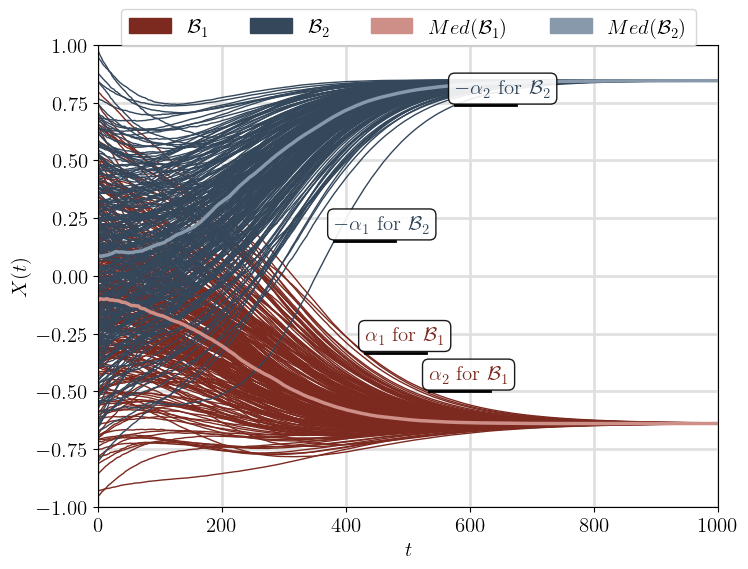

In [50]:
tStop = t
bubble1, bubble2 = bubble1_t2, bubble2_t2
tfB1, t0B1, t0B2, tfB2 = tfB1_t2, t0B1_t2, t0B2_t2, tfB2_t2
index_B1, index_B2 = index_B1_t2, index_B2_t2
name = 'topic 2.png'
PLot(bubble1, bubble2, tfB1, t0B1, t0B2, tfB2, index_B1, index_B2, name)

# 2D plot 

In [52]:
# Vertical line 
# x constant 
# y variable 
def VerticalLinePlot(scale):
    Parts = 100
    xv = scale * np.ones([Parts,1])
    yv = np.linspace(-1, 1, Parts)
    return xv, yv
def HorizontalLinePlot(scale): 
    Parts = 100
    xh = np.linspace(-1, 1, Parts)
    yh = scale * np.ones([Parts,1])
    return xh, yh

# test 

In [53]:

FONT=10
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = FONT
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif']= "Computer Modern"
    
def TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line):
    color1 = '#7c2a20'
    color2 = '#34475b'
    
    if text_color == 'red': 
        text_color = color1
    elif text_color == 'blue':
        text_color = color2
     
    sizeS = 5

    plt.figure(figsize=[6,4.5])

    patch1 = mpatches.Patch(color=color1, label=r'$\mathcal{B}_1$')
    patch2 = mpatches.Patch(color=color2, label=r'$\mathcal{B}_2$')
    
    plt.legend(handles=[patch1, patch2], prop={'size': FONT}, loc='upper center', bbox_to_anchor=(0.5,1.1),
               frameon=1, ncol=2)

    plt.scatter(data_B1_dim_1, data_B1_dim_2 ,color = color1, s=sizeS, marker=".")
    plt.scatter(data_B2_dim_1, data_B2_dim_2, color = color2, s=sizeS, marker=".")

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel(r'$x^{(1)}$')
    plt.ylabel(r'$x^{(2)}$')
    
    if timing != 0 and timing != 1000:  
        if line == 'Horizontal': 
            xv, yv  = HorizontalLinePlot(signForLine * ALPHA)
        elif line == 'Vertical':
            xv, yv  = VerticalLinePlot(signForLine * ALPHA)
        plt.plot(xv, yv, color='black', linestyle = '-', linewidth = 1)
        plt.text(text_x, text_y, text, fontsize = FONT,  color = text_color)
        plt.savefig(name, format='pdf', dpi = 300) 
        plt.show()

    else:
        plt.savefig(name, format='pdf', dpi = 300) 
        plt.show()


#### topic 1, bubble 1, alpha 1

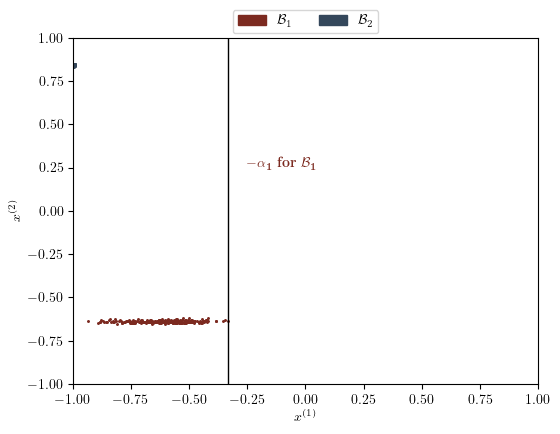

In [57]:
# topic 1
# bubble 1
# t0B1_t1 (alpha 1)

timing = t0B1_t1
name = 'topic_1_Bubble_1_alpha_1.pdf'

ALPHA = alpha1_B1
plot_color = 'red'
signForText = -1 
signForLine = -1

text_x = -0.25 
text_y = 0.25

text = r'$\mathbf{-\alpha_1}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


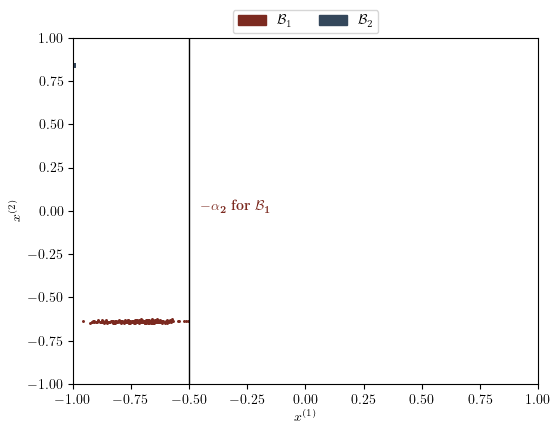

In [60]:
# topic 1
# bubble 1
# tfB1_t1 (alpha 2)

timing = tfB1_t1
name = 'topic_1_Bubble_1_alpha_2.pdf'

ALPHA = alpha2_B1
plot_color = 'red'
signForText = -1 
signForLine = -1

text_x = -0.45 
text_y = 0

text = r'$\mathbf{-\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


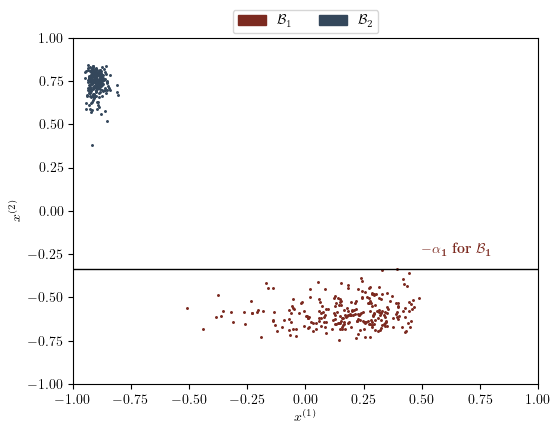

In [64]:
# topic 2
# bubble 1
# t0B1_t2 (alpha 1)
timing = t0B1_t2
name = 'topic_2_Bubble_1_alpha_1.pdf'

ALPHA = alpha1_B1
plot_color = 'red'
signForText = -1 
signForLine = -1

text_x = 0.5
text_y = -0.25

text = r'$\mathbf{-\alpha_1}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Horizontal'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


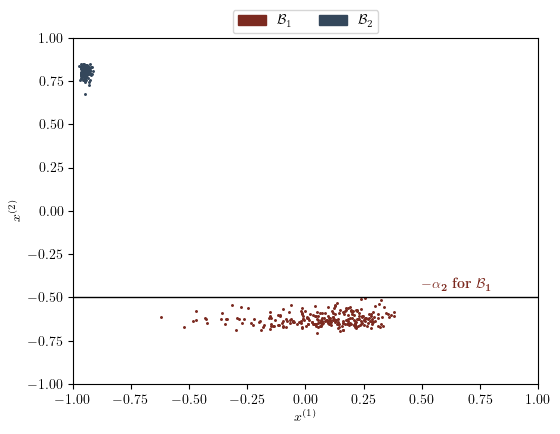

In [65]:
# topic 2
# bubble 1
# tfB1_t2 (alpha 2)
timing = tfB1_t2
name = 'topic_2_Bubble_1_alpha_2.pdf'

ALPHA = alpha2_B1
plot_color = 'red'
signForText = -1 
signForLine = -1

text_x = 0.5
text_y = -0.45

text = r'$\mathbf{-\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Horizontal'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


## Bubble 2

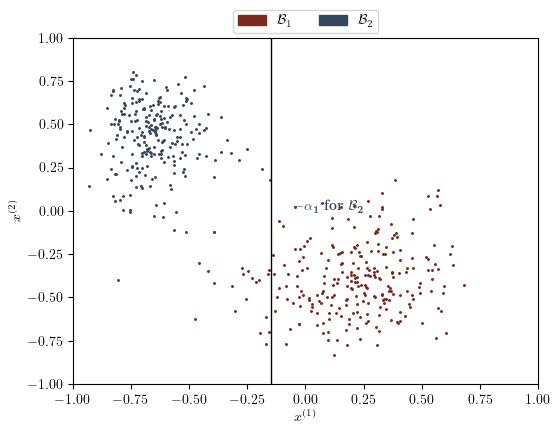

In [66]:
# topic 1
# bubble 2
# t0B1_t1 (alpha 1)

timing = t0B2_t1
name = 'topic_1_Bubble_2_alpha_1.pdf'

ALPHA = alpha1_B2
text_color = 'blue'
signForText = -1 
signForLine = -1

text_x = -0.05
text_y = 0

text = r'$\mathbf{-\alpha_1}$ \textbf{for} $\mathbf{' + '\mathcal{B}_2}$'

text_color = 'blue' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


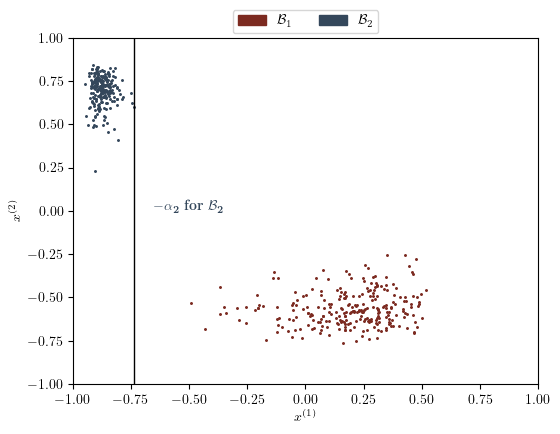

In [67]:
# topic 1
# bubble 2
# tfB2_t1 (alpha 2)

timing = tfB2_t1
name = 'topic_1_Bubble_2_alpha_2.pdf'

ALPHA = alpha2_B2
plot_color = 'blue'
signForText = -1 
signForLine = -1

text_x = -0.65
text_y = 0

text = r'$\mathbf{-\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_2}$'

text_color = 'blue' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


### Topic 2

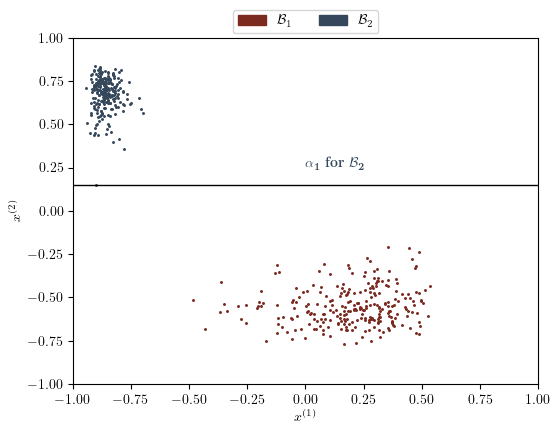

In [70]:
# topic 2
# bubble 2
# t0B2_t2 (alpha 1)

timing = t0B2_t2
name = 'topic_2_Bubble_2_alpha_1.pdf'

ALPHA = alpha1_B2
plot_color = 'blue'
signForText = +1 
signForLine = +1

text_x = 0
text_y = 0.25

text = r'$\mathbf{\alpha_1}$ \textbf{for} $\mathbf{' + '\mathcal{B}_2}$'

text_color = 'blue' 
line = 'Horizontal'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


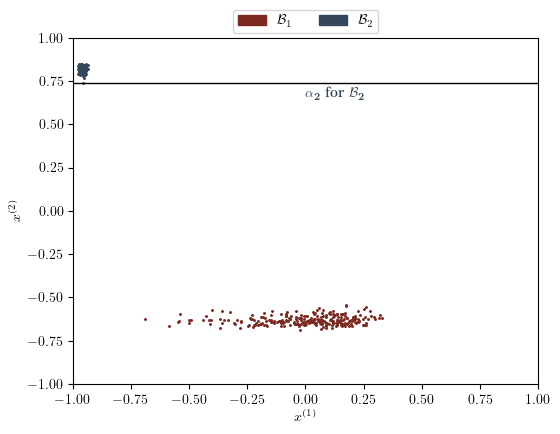

In [72]:
# topic 2
# bubble 2
# tfB2_t2 (alpha 2)

timing = tfB2_t2
name = 'topic_2_Bubble_2_alpha_2.pdf'

ALPHA = alpha2_B2
plot_color = 'blue'
signForText = +1 
signForLine = +1

text_x = 0
text_y = +0.65

text = r'$\mathbf{\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_2}$'

text_color = 'blue' 
line = 'Horizontal'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


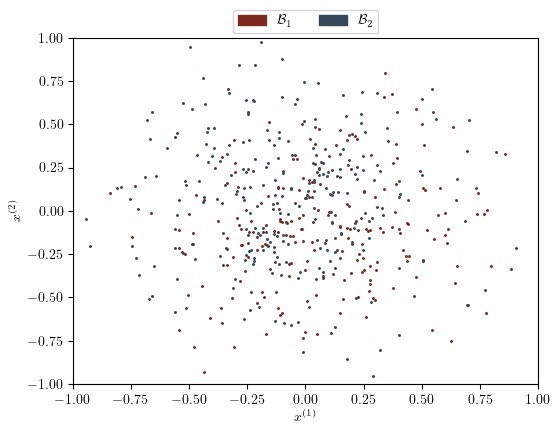

In [73]:
# start or end 

timing = 0
name = 'start.pdf'

ALPHA = alpha2_B1
plot_color = 'red'
signForText = +1 
signForLine = +1

text_x = 0.45 
text_y = 0

text = r'$\mathbf{\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


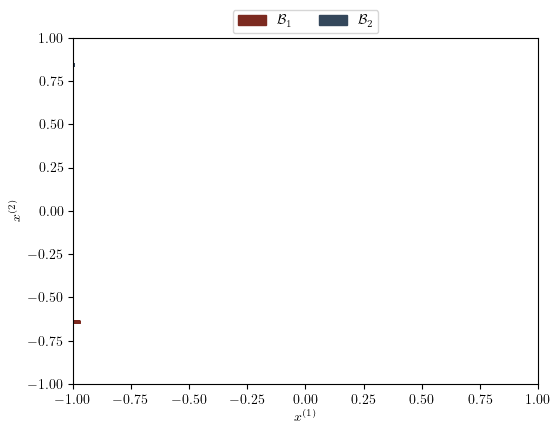

In [74]:
# start or end 

timing = 1000
name = 'end.pdf'

ALPHA = alpha2_B1
plot_color = 'red'
signForText = +1 
signForLine = +1

text_x = 0.45 
text_y = 0

text = r'$\mathbf{\alpha_2}$ \textbf{for} $\mathbf{' + '\mathcal{B}_1}$'

text_color = 'red' 
line = 'Vertical'

data_B1_dim_1 = bubble1_t1[timing][:]
data_B1_dim_2 = bubble1_t2[timing][:]

data_B2_dim_1 = bubble2_t1[timing][:]
data_B2_dim_2 = bubble2_t2[timing][:]

TwoDPlot(data_B1_dim_1, data_B1_dim_2, data_B2_dim_1, data_B2_dim_2, timing,
             name, ALPHA, signForText, signForLine, text_x, text_y, text_color, text, line)


# save information 

In [75]:
print('Information')
print('----------------')
print('B1:{}, B2:{}'.format((s1),(NodesNum-(s1))))
print('GammaB1', GammaB1)
print('GammaB2', GammaB2)
print(f'alpha1_B1:{alpha1_B1}, alpha2_B1: {alpha2_B1}')
print(f'alpha1_B1:{alpha1_B2}, alpha2_B1: {alpha2_B2}')
print('dim1: mu_B1 = {}, mu_B2 = {}'.format(mu1[0], mu1[1]))

print('dim2: mu_B1 = {}, mu_B2 = {}'.format(mu2[0], mu2[1]))


print(f'dim 1: sigma2_d1_B1 = {SigmaSquared1[0]}, sigma2_B2 = {SigmaSquared1[1]}')
print(f'dim 1: sigma2_d2_B1 = {SigmaSquared2[0]}, sigma2_B2 = {SigmaSquared2[1]}')

# print(f'd = {d}')
print(f'WeightCoeff = {WeightCoeff}')
print(f'pL = {pL}')
print(f'pG = {round(pG, 4)}')
# print(f'beta = {beta}')
print(f't = {t}')
print('----------------')

Information
----------------
B1:260, B2:240
GammaB1 6
GammaB2 9
alpha1_B1:0.333, alpha2_B1: 0.5
alpha1_B1:0.15, alpha2_B1: 0.738
dim1: mu_B1 = 0.09, mu_B2 = -0.07
dim2: mu_B1 = -0.08, mu_B2 = 0.06
dim 1: sigma2_d1_B1 = 0.15, sigma2_B2 = 0.12
dim 1: sigma2_d2_B1 = 0.13, sigma2_B2 = 0.14
WeightCoeff = 0.015
pL = 0.8
pG = 0.0624
t = 1000
----------------


In [76]:
general_info = {'total-nodes': NodesNum, 'pG':pG, 'pL': pL, 'B1': s1, 'B2':(NodesNum - s1), 
               'alpha1-B1': alpha1_B1, 'alpha2-B1': alpha2_B1, 
                'alpha1-B2': alpha1_B2, 'alpha2-B2': alpha2_B2, 
               'total-time': t, 'WeightCoeff': WeightCoeff} 
general_info

{'total-nodes': 500,
 'pG': 0.062429216196844384,
 'pL': 0.8,
 'B1': 260,
 'B2': 240,
 'alpha1-B1': 0.333,
 'alpha2-B1': 0.5,
 'alpha1-B2': 0.15,
 'alpha2-B2': 0.738,
 'total-time': 1000,
 'WeightCoeff': 0.015}

In [77]:
general_info_df = pd.DataFrame(data = list(general_info.values()), index = list(general_info.keys()),
                               columns = ['general information'])
general_info_df

,general information
total-nodes,500.000000
pG,0.062429
pL,0.800000
B1,260.000000
B2,240.000000
alpha1-B1,0.333000
alpha2-B1,0.500000
alpha1-B2,0.150000
alpha2-B2,0.738000
total-time,1000.000000


In [78]:
topic_info = {'mu-B1-topic 1': mu1[0],
              'mu-B2-topic 1': mu1[1],
              'sigma2-B1-topic 1': SigmaSquared1[0],
              'sigma2-B2-topic 1': SigmaSquared1[1],
              
              'mu-B1-topic 2': mu2[0],
              'mu-B2-topic 2': mu2[1],
              'sigma2-B1-topic 2': SigmaSquared2[0],
              'sigma2-B2-topic 2': SigmaSquared2[1],
              
              't0-B1-topic 1': t0B1_t1, 
              't0-B2-topic 1': t0B2_t1, 
              'tf-B1-topic 1': tfB1_t1, 
              'tf-B2-topic 1': tfB2_t1, 
              
              't0-B1-topic 2': t0B1_t2, 
              't0-B2-topic 2': t0B2_t2, 
              'tf-B1-topic 2': tfB1_t2, 
              'tf-B2-topic 2': tfB2_t2,
              
             }
topic_info

{'mu-B1-topic 1': 0.09,
 'mu-B2-topic 1': -0.07,
 'sigma2-B1-topic 1': 0.15,
 'sigma2-B2-topic 1': 0.12,
 'mu-B1-topic 2': -0.08,
 'mu-B2-topic 2': 0.06,
 'sigma2-B1-topic 2': 0.13,
 'sigma2-B2-topic 2': 0.14,
 't0-B1-topic 1': 752,
 't0-B2-topic 1': 257,
 'tf-B1-topic 1': 783,
 'tf-B2-topic 1': 396,
 't0-B1-topic 2': 430,
 't0-B2-topic 2': 380,
 'tf-B1-topic 2': 533,
 'tf-B2-topic 2': 575}

In [79]:
topic_info_df = pd.DataFrame(data = list(topic_info.values()), index = list(topic_info.keys()),
                               columns = ['topic infomation'])
topic_info_df

,topic infomation
mu-B1-topic 1,0.09
mu-B2-topic 1,-0.07
sigma2-B1-topic 1,0.15
sigma2-B2-topic 1,0.12
mu-B1-topic 2,-0.08
mu-B2-topic 2,0.06
sigma2-B1-topic 2,0.13
sigma2-B2-topic 2,0.14
t0-B1-topic 1,752.00
t0-B2-topic 1,257.00


```
#saving 
general_info_df.to_csv(r'C:\Users\R\Desktop\Data\2d_model1_general_info_df.csv')
topic_info_df.to_csv(r'C:\Users\R\Desktop\Data\2d_model1_topic_info_df.csv')
```


```
#reading 
info_df= pd.DataFrame(info)

df1 = pd.read_csv(r'C:\Users\R\Desktop\Data\2d_model1.B1_v1.CSV')
df2 = pd.read_csv(r'C:\Users\R\Desktop\Data\2d_model1.B2_v1.CSV')

DF1= df1.iloc[1:, 1:]
DF2= df2.iloc[1:, 1:]

Bubble1=DF1.to_numpy()
Bubble2=DF2.to_numpy()
```